# ARIMA Implementation in Python 

* Author: Kiran Kaushal Kopalley
* Date: 02/26/2024

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [2]:
df_airline=pd.read_csv('airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


Checking for missing values.

In [3]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [4]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


We can see for the Month field the last row is rendered as JUNK. So deleting that row for better analysis.

In [4]:
df_airline.dropna(axis=0,inplace=True)

In [5]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

Now we don't have NULL values.

In [6]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


Convert Month column into a DateTime field.

In [7]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [9]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [10]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


As we are attempting a Time Series analysis, setting the Month column as an index.

In [11]:
df_airline.set_index('Month',inplace=True)

In [12]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

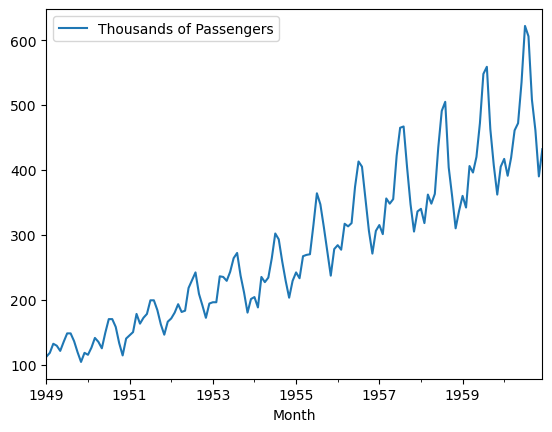

In [13]:
df_airline.plot()

Performing Dickey-Fuller Test

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [16]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060547
p- value: 0.9918802434376411
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [17]:
## Use Techniques Differencing
df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [18]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [19]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.829266824170004
p- value: 0.05421329028382491
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [20]:
## Use Techniques Differencing
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)

In [21]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics: -16.38423154246853
p- value: 2.732891850014085e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [22]:
### 12 months 
## Use Techniques Differencing
df_airline['Passengers 12 Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)

In [23]:
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.3830207264924814
p- value: 0.011551493085514952
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [24]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

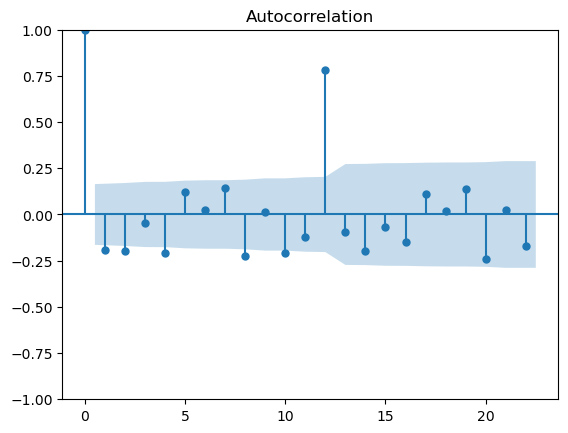

In [25]:
acf = plot_acf(df_airline["Passengers Second Difference"].dropna())

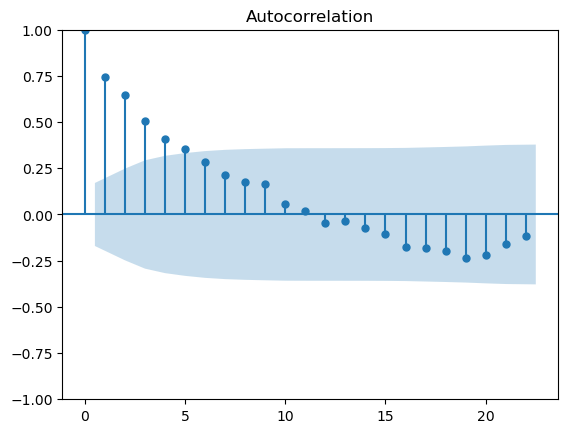

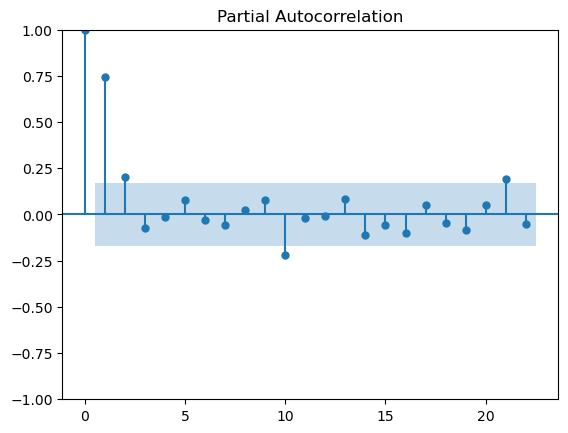

In [26]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

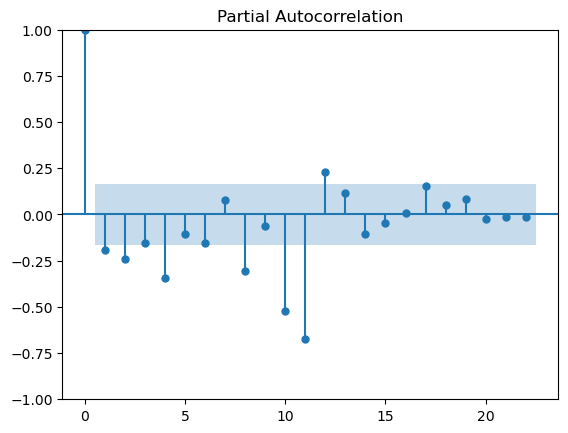

In [27]:
result = plot_pacf(df_airline["Passengers Second Difference"].dropna())

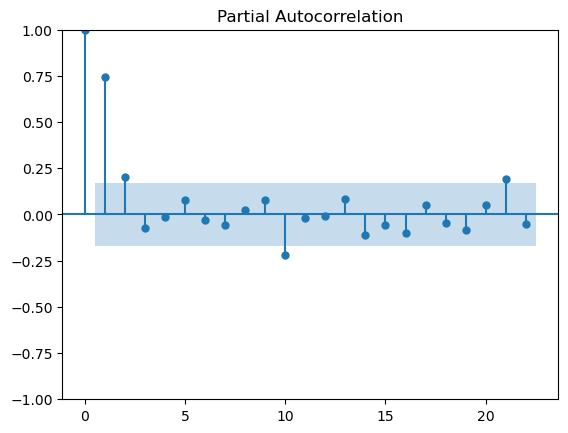

In [28]:
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [29]:
### split train and test data
df_airline

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [30]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [31]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [32]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [33]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [37]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [35]:
train_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [38]:
model_ARIMA=ARIMA(train_data['Thousands of Passengers'],order=(0,2,0))

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [44]:
model_ARIMA = sm.tsa.arima.ARIMA(train_data['Thousands of Passengers'],order=(10,2,0))
#result = model.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [45]:
model_Arima_fit=model_ARIMA.fit()

In [46]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                     ARIMA(10, 2, 0)   Log Likelihood                -357.239
Date:                     Mon, 26 Feb 2024   AIC                            736.477
Time:                             20:21:08   BIC                            762.951
Sample:                         01-01-1949   HQIC                           747.106
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5166      0.121     -4.262      0.000      -0.754      -0.279
ar.L2         -0.7204      0.121     -5.940      0.000      -0.958      -0.483
ar.L3         -0.4857      0.125     -3.876      0.000      -0.731      -0.240
ar.L4         -0.7505      0.129     -5.819      0.000      -1.003      -0.498
ar.L5         -0.5062      0.169     -2.991      0.003      -0.838      -0.175
ar.L6         -0.5200      0.141     -3.683      0.000      -0.797      -0.243
ar.L7         -0.3051      0.143     -2.127      0.033      -0.586      -0.024
ar.L8         -0.5939      0.155     -3.833      0.000      -0.898      -0.290
ar.L9         -0.2963      0.132     -2.241      0.025      -0.555      -0.037
ar.L10        -0.4825      0.110     -4.376      0.000      -0.699      -0.266
sigma2       336.0939     66.064      5.087      0.000     206.612     465.576
===================================================================================
Ljung-Box (L1) (Q):                  10.86   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.00   Prob(JB):                         0.54
Heteroskedasticity (H):               2.85   Skew:                             0.24
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [48]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [49]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

In [50]:
pred

1956-01-01    300.183615
1956-02-01    309.478360
1956-03-01    316.443017
1956-04-01    307.827547
1956-05-01    318.544239
1956-06-01    348.922090
1956-07-01    366.020297
1956-08-01    346.567542
1956-09-01    332.120971
1956-10-01    307.734756
1956-11-01    311.623915
1956-12-01    339.828203
1957-01-01    349.840416
1957-02-01    356.098243
1957-03-01    350.687834
1957-04-01    350.080472
1957-05-01    361.157704
1957-06-01    381.216530
1957-07-01    382.319389
1957-08-01    372.852590
1957-09-01    364.110102
1957-10-01    356.108932
1957-11-01    371.293800
1957-12-01    385.323610
1958-01-01    392.077854
1958-02-01    391.405864
1958-03-01    388.404592
1958-04-01    391.572871
1958-05-01    402.448097
1958-06-01    413.255704
1958-07-01    410.853434
1958-08-01    407.670558
1958-09-01    402.486347
1958-10-01    406.089162
1958-11-01    418.125332
1958-12-01    426.012397
1959-01-01    429.205602
1959-02-01    427.352249
1959-03-01    428.151006
1959-04-01    432.790868


In [51]:
residuals

Month
1956-01-01    -16.183615
1956-02-01    -32.478360
1956-03-01      0.556983
1956-04-01      5.172453
1956-05-01     -0.544239
1956-06-01     25.077910
1956-07-01     46.979703
1956-08-01     58.432458
1956-09-01     22.879029
1956-10-01     -1.734756
1956-11-01    -40.623915
1956-12-01    -33.828203
1957-01-01    -34.840416
1957-02-01    -55.098243
1957-03-01      5.312166
1957-04-01     -2.080472
1957-05-01     -6.157704
1957-06-01     40.783470
1957-07-01     82.680611
1957-08-01     94.147410
1957-09-01     39.889898
1957-10-01     -9.108932
1957-11-01    -66.293800
1957-12-01    -49.323610
1958-01-01    -52.077854
1958-02-01    -73.405864
1958-03-01    -26.404592
1958-04-01    -43.572871
1958-05-01    -39.448097
1958-06-01     21.744296
1958-07-01     80.146566
1958-08-01     97.329442
1958-09-01      1.513653
1958-10-01    -47.089162
1958-11-01   -108.125332
1958-12-01    -89.012397
1959-01-01    -69.205602
1959-02-01    -85.352249
1959-03-01    -22.151006
1959-04-01    -36.7

<Axes: ylabel='Density'>

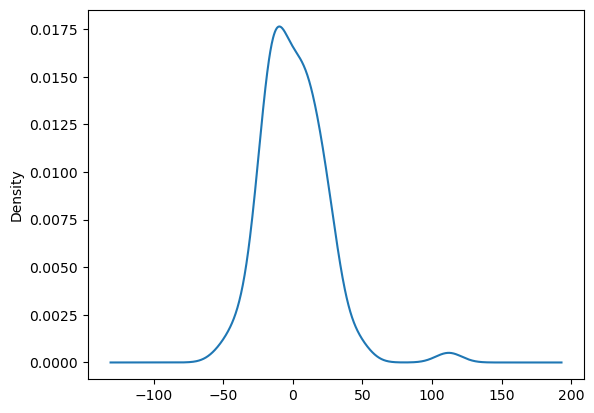

In [52]:
model_Arima_fit.resid.plot(kind='kde')

In [53]:
test_data['Predicted_ARIMA']=pred

C:\Users\kkopalley\AppData\Local\Temp\ipykernel_23784\95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<Axes: xlabel='Month'>

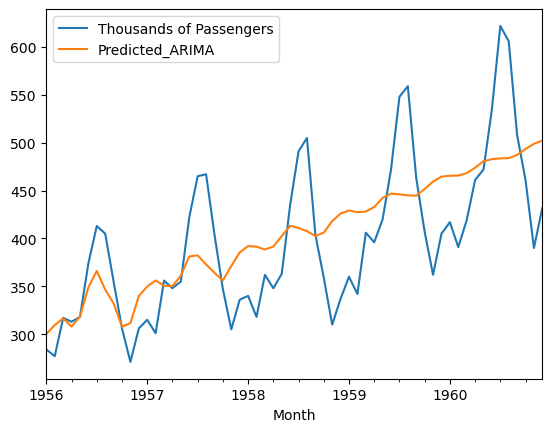

In [54]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

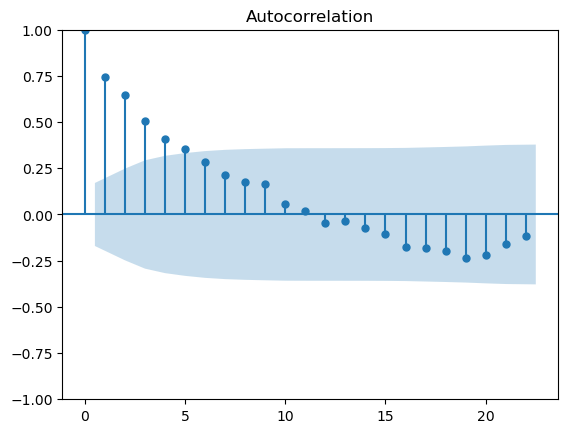

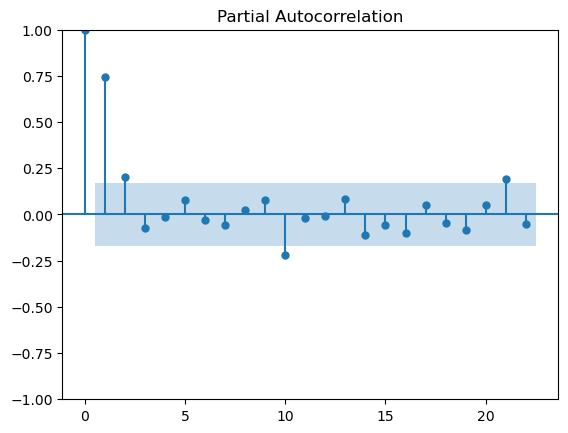

In [55]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [56]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [57]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [58]:
model_SARIMA_fit=model_SARIMA.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [59]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Mon, 26 Feb 2024   AIC                            548.481
Time:                                     20:30:37   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5988      0.938      0.639      0.523      -1.239       2.437
ar.L2          0.8312      0.232      3.579      0.000       0.376       1.286
ar.L3         -0.4531      0.894     -0.507      0.612      -2.205       1.299
ma.L1          0.1832      1.164      0.157      0.875      -2.099       2.465
ma.L2         -0.5346      1.262     -0.424      0.672      -3.008       1.939
ma.L3         -0.0986      0.384     -0.257      0.797      -0.851       0.654
ma.L4         -0.1272      0.337     -0.377      0.706      -0.788       0.533
ma.L5          0.2472      0.357      0.693      0.488      -0.452       0.946
sigma2        87.7283     81.079      1.082      0.279     -71.183     246.640
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
test_data.tail()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA
Month,,,,,
1960-08-01,606.0,-16.0,-103.0,47.0,483.884007
1960-09-01,508.0,-98.0,-82.0,45.0,487.184132
1960-10-01,461.0,-47.0,51.0,54.0,493.432815
1960-11-01,390.0,-71.0,-24.0,28.0,498.930107
1960-12-01,432.0,42.0,113.0,27.0,502.159858


In [61]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [62]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

<Axes: xlabel='Month'>

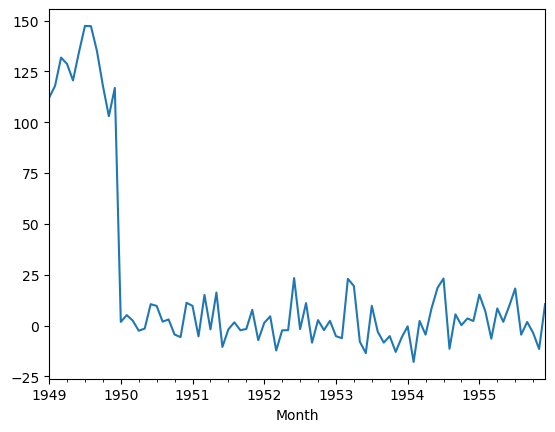

In [63]:
model_SARIMA_fit.resid.plot()

<Axes: ylabel='Density'>

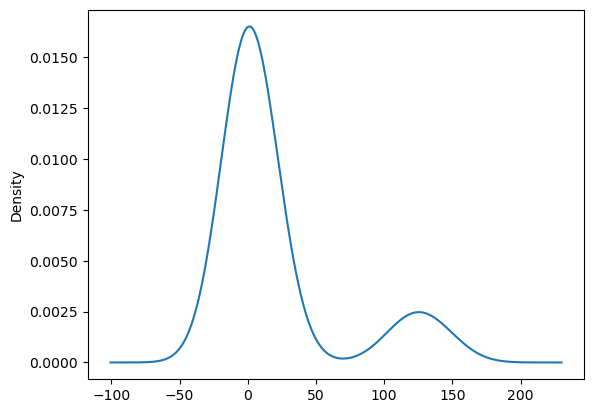

In [64]:
model_SARIMA_fit.resid.plot(kind='kde')

In [65]:
test_data['Predicted_SARIMA']=pred_Sarima

C:\Users\kkopalley\AppData\Local\Temp\ipykernel_23784\1367177785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [66]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,300.183615,NaN
1956-02-01,277.0,-7.0,-13.0,44.0,309.478360,NaN
1956-03-01,317.0,40.0,47.0,50.0,316.443017,NaN
1956-04-01,313.0,-4.0,-44.0,44.0,307.827547,NaN
1956-05-01,318.0,5.0,9.0,48.0,318.544239,NaN
1956-06-01,374.0,56.0,51.0,59.0,348.922090,NaN
1956-07-01,413.0,39.0,-17.0,49.0,366.020297,403.397643
1956-08-01,405.0,-8.0,-47.0,58.0,346.567542,385.071015
1956-09-01,355.0,-50.0,-42.0,43.0,332.120971,349.444485


<Axes: xlabel='Month'>

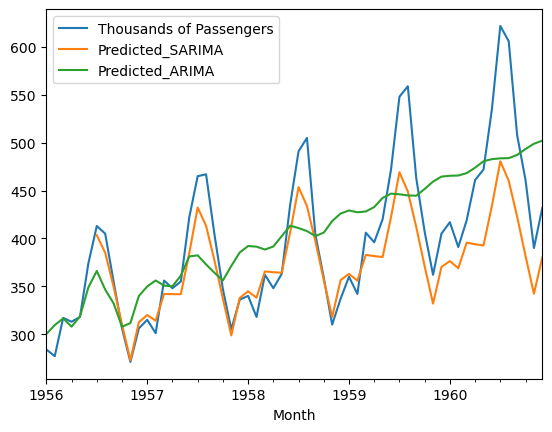

In [67]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()